In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

In [6]:
archive = np.load('../data/nurikabe.npz')
file = archive.files[1]
entry = archive[file]

file, entry

('https://www.logicgamesonline.com/nurikabe/archive.php?pid=2',
 array([[ 0.,  4., -1.,  5.,  0., -1., -1., -1., -1.],
        [ 0., -1., -1.,  0., -1., -1.,  6.,  0.,  0.],
        [ 0., -1.,  0.,  0., -1.,  1., -1., -1.,  0.],
        [-1., -1., -1., -1., -1., -1.,  3., -1.,  0.],
        [ 0., -1.,  0.,  0., -1.,  0.,  0., -1.,  0.],
        [ 0., -1.,  3., -1., -1., -1., -1., -1., -1.],
        [ 0., -1., -1.,  5.,  0.,  0.,  0.,  0., -1.],
        [ 0.,  0.,  7., -1., -1., -1., -1., -1., -1.],
        [ 0., -1., -1., -1.,  0.,  2., -1.,  1., -1.]]))

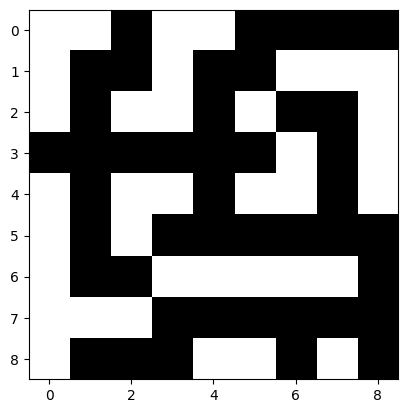

In [7]:
clip = np.minimum(entry, 0)
plt.imshow(clip + 1, cmap='grey')

In [8]:
file = archive.files[2]
entry = archive[file]

file, entry

('https://www.logicgamesonline.com/nurikabe/archive.php?pid=3',
 array([[-1., -1., -1., -1.,  3.,  0., -1., -1., -1.],
        [-1.,  0.,  0.,  4., -1.,  0., -1.,  0., -1.],
        [-1., -1., -1.,  0., -1., -1., -1.,  0., -1.],
        [-1.,  0.,  2., -1.,  2.,  0., -1.,  3., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1.,  1., -1.,  0.,  3., -1.,  4.,  0., -1.],
        [-1., -1., -1.,  0., -1.,  0., -1.,  0., -1.],
        [-1.,  0., -1., -1., -1.,  2., -1.,  0., -1.],
        [-1.,  0.,  0.,  0.,  5., -1., -1., -1., -1.]]))

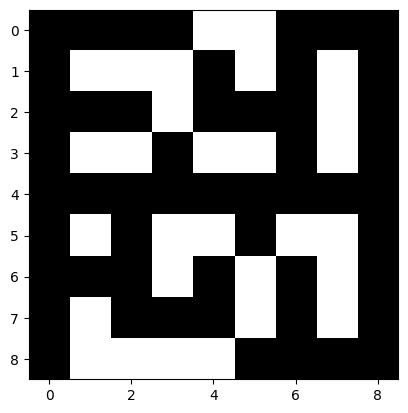

In [9]:
clip = np.minimum(entry, 0)
plt.imshow(clip + 1, cmap='grey')

In [24]:
def generate_trajectory_random(solution):
    nrows, ncols = solution.shape
    initial_board = np.where(
        (solution == 0) | (solution == -1),
        -2, solution)
    
    current_board = np.copy(initial_board)
    replaceable_cells = [
        (i, j) for i in range(nrows) for j in range(ncols)
        if current_board[i, j] == -2]
    np.random.shuffle(replaceable_cells)
    
    trajectory = [np.copy(current_board)]
    for cell in replaceable_cells:
        i, j = cell
        correct_value = solution[i, j]
        current_board[i, j] = correct_value
        trajectory.append(np.copy(current_board))
    
    return trajectory

solution_board = np.array([
    [1, -1, -1, -1],
    [-1, 0, -1, 1],
    [-1, 2, -1, -1],
    [-1, -1, -1, 0],
    [2, 0, -1, 2],
    [-1, -1, -1, -1]
])

trajectory = generate_trajectory_random(solution_board)

In [25]:
trajectory

[array([[ 1, -2, -2, -2],
        [-2, -2, -2,  1],
        [-2,  2, -2, -2],
        [-2, -2, -2, -2],
        [ 2, -2, -2,  2],
        [-2, -2, -2, -2]]),
 array([[ 1, -1, -2, -2],
        [-2, -2, -2,  1],
        [-2,  2, -2, -2],
        [-2, -2, -2, -2],
        [ 2, -2, -2,  2],
        [-2, -2, -2, -2]]),
 array([[ 1, -1, -2, -2],
        [-2, -2, -2,  1],
        [-2,  2, -2, -2],
        [-2, -2, -1, -2],
        [ 2, -2, -2,  2],
        [-2, -2, -2, -2]]),
 array([[ 1, -1, -2, -2],
        [-1, -2, -2,  1],
        [-2,  2, -2, -2],
        [-2, -2, -1, -2],
        [ 2, -2, -2,  2],
        [-2, -2, -2, -2]]),
 array([[ 1, -1, -2, -2],
        [-1, -2, -2,  1],
        [-2,  2, -1, -2],
        [-2, -2, -1, -2],
        [ 2, -2, -2,  2],
        [-2, -2, -2, -2]]),
 array([[ 1, -1, -2, -2],
        [-1, -2, -2,  1],
        [-2,  2, -1, -2],
        [-1, -2, -1, -2],
        [ 2, -2, -2,  2],
        [-2, -2, -2, -2]]),
 array([[ 1, -1, -2, -2],
        [-1, -2, -2,  1],


In [26]:
def plot_nurikabe_board(board):
    # Colors: gray for -2, black for -1, white for 0 and white for numbers
    cmap = ListedColormap(['gray', 'black', 'white', 'white'])
    max_val = np.max(board) if np.max(board) > 1 else 2
    boundaries = [-2.5, -1.5, -0.5, 0.5, max_val + 0.5]
    norm = BoundaryNorm(boundaries, cmap.N)

    fig, ax = plt.subplots()
    heatmap = ax.imshow(board, cmap=cmap, norm=norm)

    for i in range(board.shape[0]):
        for j in range(board.shape[1]):
            if board[i, j] > 0:
                ax.text(j, i, int(board[i, j]), ha='center', va='center', color='black',
                       fontdict={'size': 16})

    ax.axis('off')
    plt.show()


0


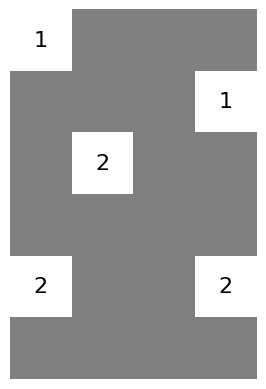

1


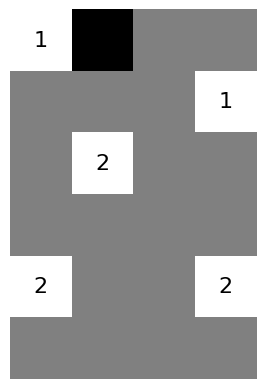

2


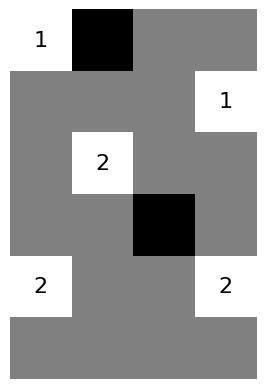

3


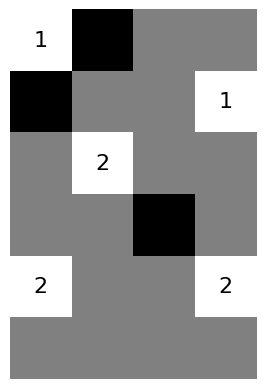

4


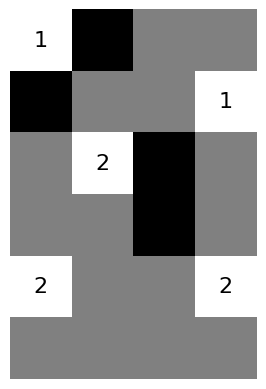

5


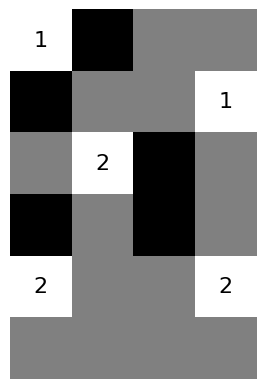

6


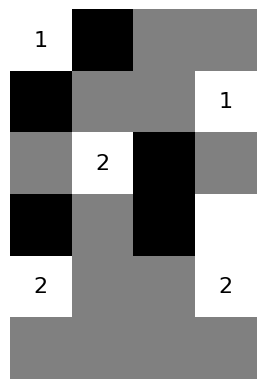

7


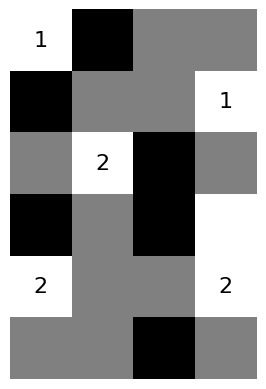

8


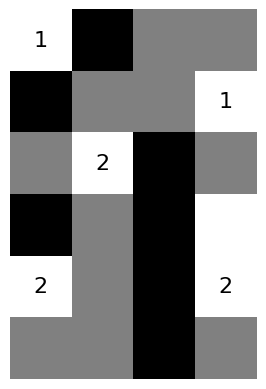

9


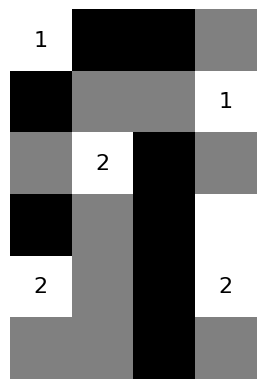

10


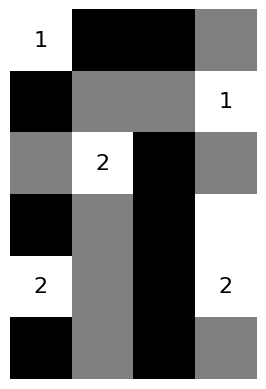

11


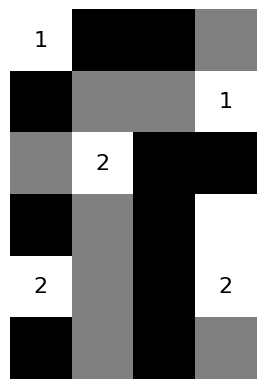

12


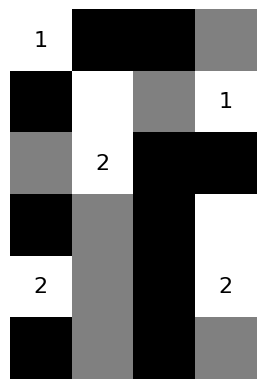

13


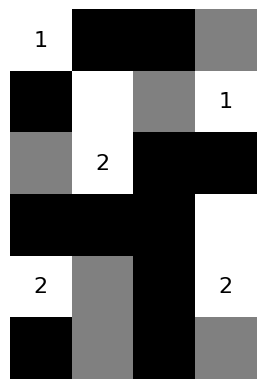

14


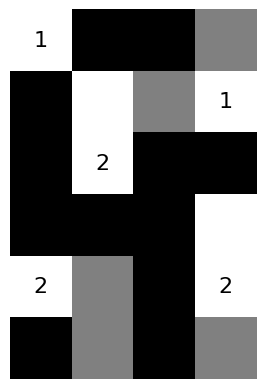

15


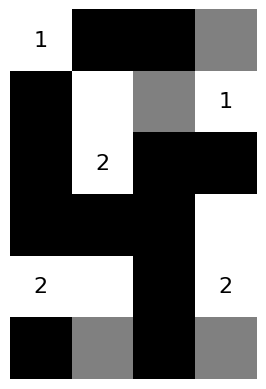

16


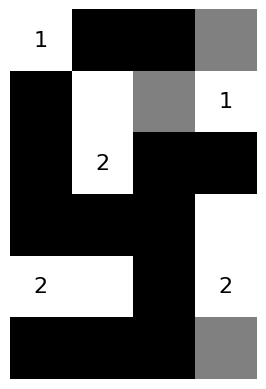

17


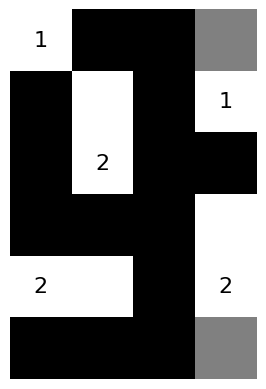

18


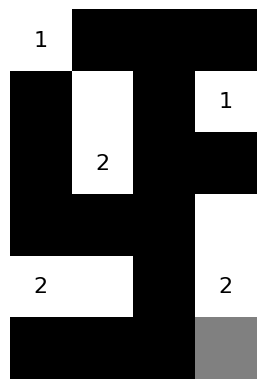

19


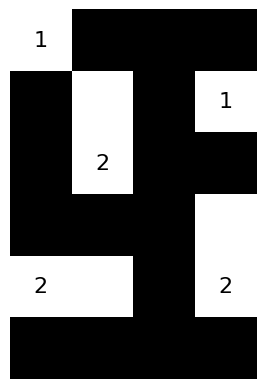

In [27]:
for i, board in enumerate(trajectory):
    print(i)
    plot_nurikabe_board(board)

In [72]:
def generate_trajectory_basic(solution):
    nrows, ncols = solution.shape
    initial_board = np.where(
        (solution == 0) | (solution == -1),
        -2, solution)
    
    current_board = np.copy(initial_board)
    trajectory = [np.copy(current_board)]

    def check(i, j, answer):
        return solution[i, j] == answer

    # mark off single-celled islands
    for i in range(nrows):
        for j in range(ncols):
            if current_board[i, j] == 1:
                if (i - 1 >= 0 and j >= 0) and current_board[i - 1, j] != -1:
                    assert check(i - 1, j, -1)
                    current_board[i - 1, j] = -1
                    
                    trajectory.append(np.copy(current_board))
                if (i + 1 < nrows and j < ncols) and current_board[i + 1, j] != -1:
                    assert check(i + 1, j, -1)
                    current_board[i + 1, j] = -1
                    
                    trajectory.append(np.copy(current_board))
                if (i < nrows and j + 1 < ncols) and current_board[i, j + 1] != -1:
                    assert check(i, j + 1, -1)
                    current_board[i, j + 1] = -1
                    
                    trajectory.append(np.copy(current_board))
                if (i >= 0 and j - 1 >= 0) and current_board[i, j - 1] != -1:
                    assert check(i, j - 1, -1)
                    current_board[i, j - 1] = -1
                    
                    trajectory.append(np.copy(current_board))

    # separate adjacent islands
    for i in range(nrows - 1):
        for j in range(ncols):
            if current_board[i, j] >= 1:
                # (1, -1)
                ni, nj = i + 1, j - 1
                if (0 <= ni < nrows and 0 <= nj < ncols) and current_board[ni, nj] >= 1:
                    if current_board[i, j - 1] != -1:
                        assert check(i, j - 1, -1)
                        current_board[i, j - 1] = -1
                        trajectory.append(np.copy(current_board))
                    if current_board[i + 1, j] != -1:
                        assert check(i + 1, j, -1)
                        current_board[i + 1, j] = -1
                        trajectory.append(np.copy(current_board))
                # (1, 1)
                ni, nj = i + 1, j + 1
                if (0 <= ni < nrows and 0 <= nj < ncols) and current_board[ni, nj] >= 1:
                    if current_board[i, j + 1] != -1:
                        assert check(i, j + 1, -1)
                        current_board[i, j + 1] = -1
                        trajectory.append(np.copy(current_board))
                    if current_board[i + 1, j] != -1:
                        assert check(i + 1, j, -1)
                        current_board[i + 1, j] = -1
                        trajectory.append(np.copy(current_board))

    # off by 1
    for i in range(nrows):
        for j in range(ncols):
            if current_board[i, j] >= 1:
                ni, nj = i, j + 2
                if (0 <= ni < nrows and 0 <= nj < ncols) and current_board[ni, nj] >= 1:
                    current_board[i, j + 1] = -1
                    trajectory.append(np.copy(current_board))
                ni, nj = i + 2, j
                if (0 <= ni < nrows and 0 <= nj < ncols) and current_board[ni, nj] >= 1:
                    current_board[i + 1, j] = -1
                    trajectory.append(np.copy(current_board))
                
    
    # check for elbow shapes
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            subgrid = current_board[i:i+2, j:j+2]
            # print(f'i={i}, j={j}', subgrid)
            if (subgrid[0, 0] == -1 and subgrid[0, 1] == -1 and subgrid[1, 0] == -1 and subgrid[1, 1] == -2):
                assert check(i + 1, j + 1, 0)
                current_board[i + 1, j + 1] = 0
                trajectory.append(np.copy(current_board))
            if (subgrid[0, 0] == -1 and subgrid[0, 1] == -1 and subgrid[1, 0] == -2 and subgrid[1, 1] == -1):
                assert check(i + 1, j, 0)
                current_board[i + 1, j] = 0
                trajectory.append(np.copy(current_board))
            if (subgrid[0, 0] == -1 and subgrid[0, 1] == -2 and subgrid[1, 0] == -1 and subgrid[1, 1] == -1):
                assert check(i, j + 1, 0)
                current_board[i, j + 1] = 0
                trajectory.append(np.copy(current_board))
            if (subgrid[0, 0] == -2 and subgrid[0, 1] == -1 and subgrid[1, 0] == -1 and subgrid[1, 1] == -1):
                assert check(i, j, 0)
                current_board[i, j] = 0
                trajectory.append(np.copy(current_board))


    return trajectory
                

0


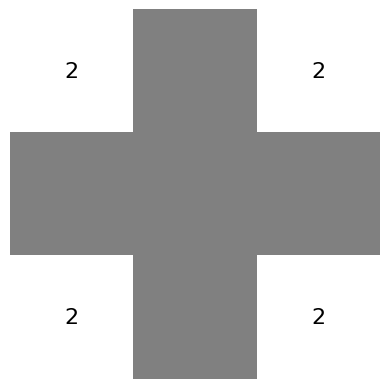

1


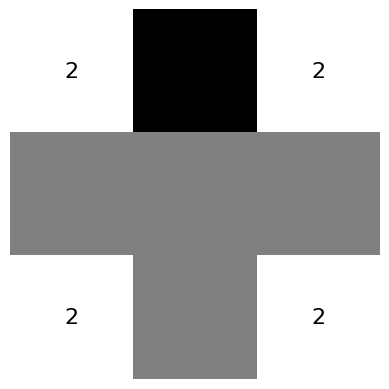

2


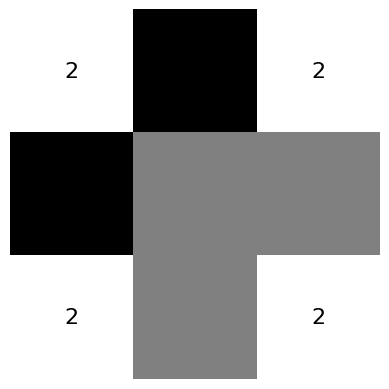

3


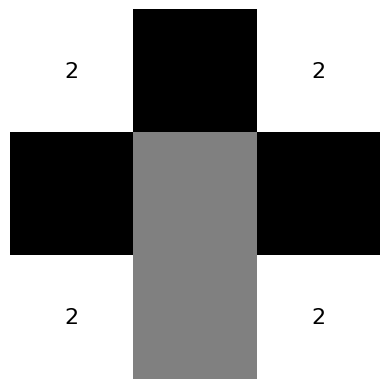

4


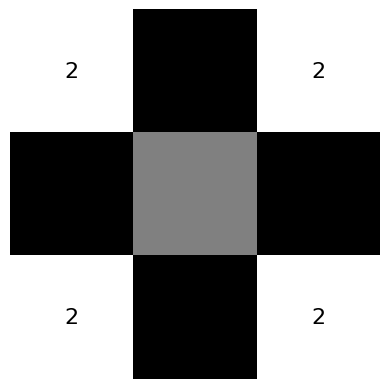

In [74]:
trajectory = generate_trajectory_basic(
    np.array([
        [2, -2, 2],
        [-2, -2, -2],
        [2, -2, 2]
    ])
)

for i, board in enumerate(trajectory):
    print(i)
    plot_nurikabe_board(board)